In [2]:
#!/usr/bin/env python3
# Find pareto optimal for scoring tables from the grid search
# Author: Nikita Sapozhnikov, nikita.sapozhnikov1@gmail.com
# Date: June 08, 2023
# pareto_optimal_A v0.1
# Please check README.txt
# python3 pareto_optimal_A.py

import numpy as np
import datetime
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

main_fp = '/mnt/wd/nsap/Clustering/Parameters_search/'

### read scores file
print('Reading consolidated scores file...')
pd_df = pd.read_excel(main_fp+'best_params_clustering_A.xlsx')
print(pd_df)

Reading consolidated scores file...
       chr algorithm  clusters   eps  min_samples  sil_score  CH_score
0        1    dbscan        24  0.10            2   0.000935  3.977939
1        1   hdbscan       843  0.10            2   0.085788  3.046771
2        1    dbscan         1  0.10            3   0.000746  7.253398
3        1   hdbscan       437  0.10            3   0.058785  3.400832
4        1    dbscan         0  0.10            4   0.000000  0.000000
...    ...       ...       ...   ...          ...        ...       ...
14251   22   hdbscan         3  0.95           17   0.003395  6.465992
14252   22    dbscan         2  0.95           18   0.003499  8.409228
14253   22   hdbscan         3  0.95           18   0.003403  6.494573
14254   22    dbscan         0  0.95           19   0.000000  0.000000
14255   22   hdbscan         3  0.95           19   0.003482  6.658320

[14256 rows x 7 columns]


      chr algorithm  clusters   eps  min_samples  sil_score  CH_score
648     2    dbscan        34  0.10            2   0.002751  3.511821
650     2    dbscan         0  0.10            3   0.000000  0.000000
652     2    dbscan         0  0.10            4   0.000000  0.000000
654     2    dbscan         0  0.10            5   0.000000  0.000000
656     2    dbscan         0  0.10            6   0.000000  0.000000
...   ...       ...       ...   ...          ...        ...       ...
1286    2    dbscan        13  0.95           15   0.002483  6.410531
1288    2    dbscan         6  0.95           16   0.001176  7.173589
1290    2    dbscan         4  0.95           17   0.000909  7.800898
1292    2    dbscan         4  0.95           18   0.000917  7.907386
1294    2    dbscan         4  0.95           19   0.000917  7.907386

[324 rows x 7 columns]


<AxesSubplot: xlabel='min_samples', ylabel='eps'>

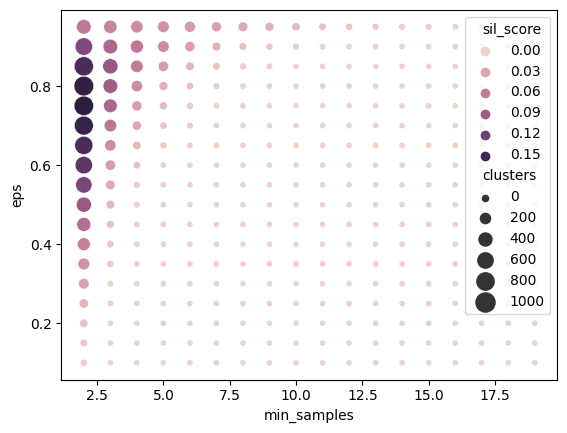

In [3]:
### plot each score for each method
# plot sil_score for DBSCAN
sil_dbscan_df = pd_df.loc[(pd_df['algorithm'] == 'dbscan') & (pd_df['chr'] == 2)]
print(sil_dbscan_df)
sns.scatterplot(
    data=sil_dbscan_df, x="min_samples", y="eps", hue="sil_score", size="clusters",
    sizes=(20, 200)
)

In [40]:
# Initialize an empty list to store the Pareto optimal solutions
pareto_optimal = []

# Iterate over each row in the DataFrame
for i, row in sil_dbscan_df.iterrows():
    is_pareto = True
    for j, compare_row in sil_dbscan_df.iterrows():
        # Check if the current row dominates any other row
        if (row['clusters'] < compare_row['clusters'] and row['sil_score'] <= compare_row['sil_score']) or \
                (row['clusters'] <= compare_row['clusters'] and row['sil_score'] < compare_row['sil_score']):
            is_pareto = False
            break
    if is_pareto:
        pareto_optimal.append(row)

# Convert the Pareto optimal solutions list back to a DataFrame
pareto_df = pd.DataFrame(pareto_optimal)

print(pareto_df[['eps', 'min_samples']])
print(pareto_df)


      eps  min_samples
1    0.10            2
37   0.15            2
73   0.20            2
109  0.25            2
145  0.30            2
181  0.35            2
217  0.40            2
253  0.45            2
289  0.50            2
325  0.55            2
361  0.60            2
397  0.65            2
433  0.70            2
469  0.75            2
505  0.80            2
     chr algorithm  clusters   eps  min_samples  sil_score  CH_score
1      1   hdbscan       269  0.10            2   0.018494   3.38781
37     1   hdbscan       269  0.15            2   0.018494   3.38781
73     1   hdbscan       269  0.20            2   0.018494   3.38781
109    1   hdbscan       269  0.25            2   0.018494   3.38781
145    1   hdbscan       269  0.30            2   0.018494   3.38781
181    1   hdbscan       269  0.35            2   0.018494   3.38781
217    1   hdbscan       269  0.40            2   0.018494   3.38781
253    1   hdbscan       269  0.45            2   0.018494   3.38781
289    1   

In [7]:
def compute_score(row):
    # Extract values from different columns
    clusters = row['clusters']
    sil_score = row['sil_score']
    CH_score = row['CH_score']
    # weighted multiplication
    result = clusters * 0.35 * sil_score * 0.55 * CH_score * 0.1     
    return result

pd_df['computed_score'] = (pd_df['clusters'] * 0.35 * 
                           pd_df['sil_score'] * 0.55 * 
                           pd_df['CH_score'] * 0.1)
best_scores_df = pd.DataFrame(columns=['chr',
                                       'algorithm',
                                       'clusters',
                                       'eps',
                                       'min_samples',
                                       'sil_score',
                                       'CH_score',
                                       'computed_score'])
for num_chr in range(1,23):
    # DBSCAN
    sil_dbscan_df = pd_df.loc[(pd_df['algorithm'] == 'dbscan') & (pd_df['chr'] == num_chr)]
    max_row = sil_dbscan_df[sil_dbscan_df['computed_score'] == sil_dbscan_df['computed_score'].max()]
    print('Best calculated score for DBSCAN: ', max_row, sep='\n')
    best_scores_df = pd.concat([best_scores_df, max_row])
    # HDBSCAN
    sil_hdbscan_df = pd_df.loc[(pd_df['algorithm'] == 'hdbscan') & (pd_df['chr'] == num_chr)]
    max_row = sil_hdbscan_df[sil_hdbscan_df['computed_score'] == sil_hdbscan_df['computed_score'].max()]
    print('Best calculated score for HDBSCAN: ', max_row, sep='\n')
    best_scores_df = pd.concat([best_scores_df, max_row])
    print('\n\n')
    
print(best_scores_df)

Best calculated score for DBSCAN: 
     chr algorithm  clusters   eps  min_samples  sil_score  CH_score  \
468    1    dbscan       966  0.75            2   0.161984  3.631837   

     computed_score  
468       10.939723  
Best calculated score for HDBSCAN: 
     chr algorithm  clusters  eps  min_samples  sil_score  CH_score  \
433    1   hdbscan       830  0.7            2    0.08785  3.063074   

     computed_score  
433         4.29942  



Best calculated score for DBSCAN: 
      chr algorithm  clusters   eps  min_samples  sil_score  CH_score  \
1116    2    dbscan      1043  0.75            2   0.161456  3.804217   

      computed_score  
1116       12.331992  
Best calculated score for HDBSCAN: 
      chr algorithm  clusters   eps  min_samples  sil_score  CH_score  \
1045    2   hdbscan       909  0.65            2   0.087859  3.218005   

      computed_score  
1045        4.947308  



Best calculated score for DBSCAN: 
      chr algorithm  clusters   eps  min_samples  sil_s

In [ ]:
for num_chr in range(1,23):
    sil_hdbscan_df = pd_df.loc[(pd_df['algorithm'] == 'hdbscan') & (pd_df['chr'] == num_chr)]
    max_row = sil_hdbscan_df[sil_hdbscan_df['computed_score'] == sil_hdbscan_df['computed_score'].max()]
    print(max_row)

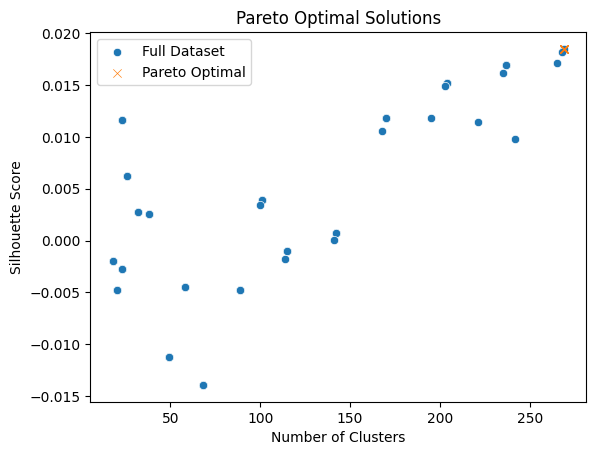

In [41]:
# Create a scatter plot using Seaborn
sns.scatterplot(data=sil_dbscan_df, x='clusters', y='sil_score', label='Full Dataset')

# Add a layer for the Pareto optimal solutions
sns.scatterplot(data=pareto_df, x='clusters', y='sil_score', label='Pareto Optimal', marker='x')

# Add labels and title to the plot
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Pareto Optimal Solutions')

# Show the legend
plt.legend()

# Display the plot
plt.show()